In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
import tensorflow as tf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
scaler = StandardScaler()

# 1-1. Fit the data using linear (1st order) regression model (matrix form, gradient descent method).
### Plot the data with the fitted line. Print optimized weights. Print Root Mean Squared Error (RMSE).

In [198]:
data1 = pd.read_csv("ex2data1.csv")
X_1 = data1.as_matrix(columns=data1.columns[0:1])
Y_1 = data1.as_matrix(columns=data1.columns[1:])
X_1_coloumn_added = np.c_[np.ones((data1.shape[0], 1)), X_1]

In [10]:
def weight_optimizer(data,degree,Label,learn_rate = .01,epochs = 100000,regularisation_alpha=0):
    theta_1 = np.random.randn(degree+1,1)
    for epoch in range(epochs):
        gradients = (2/data.shape[0])* (data.T.dot(data.dot(theta_1)- Label)+regularisation_alpha*theta_1)
        theta_1 = theta_1 - learn_rate * gradients
    return theta_1

In [11]:
def rmse_calculator(data,weights,actual_label):
    predict_y = data.dot(weights)
    rms = sqrt(mean_squared_error(actual_label, predict_y))
    return rms

In [12]:
# Please input sorted data
def graph_plotter(X_1_poly_dn_scaled_coloumn_added,weights,actual_label,graph_label=None):
    X_1_poly_dn_scaled_coloumn_added_sorted = X_1_poly_dn_scaled_coloumn_added [X_1_poly_dn_scaled_coloumn_added [:,1].argsort()]
    plt.plot(X_1_poly_dn_scaled_coloumn_added_sorted[:,1:2], actual_label, 'bo')
    y_1_dn_plot = X_1_poly_dn_scaled_coloumn_added_sorted.dot(weights)
    plt.plot(X_1_poly_dn_scaled_coloumn_added_sorted[:,1:2], y_1_dn_plot,label=graph_label)
    legend = plt.legend(loc='upper right', shadow=True)

In [13]:
def polynomial_adder(data,degree):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_1_poly_dn = poly_features.fit_transform(data)
    X_1_poly_dn_scaled = scaler.fit_transform(X_1_poly_dn)
    X_1_poly_dn_scaled_coloumn_added = np.c_[np.ones((data.shape[0], 1)), X_1_poly_dn_scaled]
    ## Sorting for graph plotting
    #X_1_poly_dn_scaled_coloumn_added = X_1_poly_dn_scaled_coloumn_added [X_1_poly_dn_scaled_coloumn_added [:,1].argsort()]
    return X_1_poly_dn_scaled_coloumn_added

## Optimized Weight - Deg1


In [204]:
theta_1 = weight_optimizer(X_1_coloumn_added,1,Y_1)
print (theta_1)

[[ 1.07581132]
 [-1.1887203 ]]


## RMSE - Deg1


In [205]:
rms_1 = rmse_calculator(X_1_coloumn_added,theta_1,Y_1)
print (rms_1)

0.47624021947640577


## Plot - Deg1

No handles with labels found to put in legend.


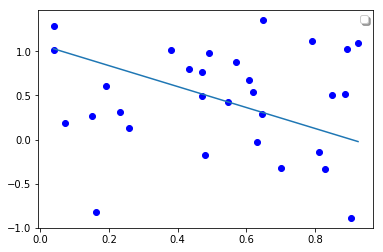

In [206]:
graph_plotter(X_1_coloumn_added,theta_1,Y_1)

# 1-2. Fit the data using 2nd order polynomial regression model (matrix form, gradient descent method).

In [207]:
X_1_poly_d2_scaled_coloumn_added = polynomial_adder(X_1,2)

## Optimized Weight - deg2

In [208]:
theta_1_d2 = weight_optimizer(X_1_poly_d2_scaled_coloumn_added,2,Y_1,epochs=1000000)
print (theta_1_d2)

[[ 0.45269151]
 [ 1.13735736]
 [-1.51236155]]


## RMSE

In [209]:
rms_1_d2 = rmse_calculator(X_1_poly_d2_scaled_coloumn_added,theta_1_d2,Y_1)
print (rms_1_d2)

0.2856992946970416


## Plot - deg2

No handles with labels found to put in legend.


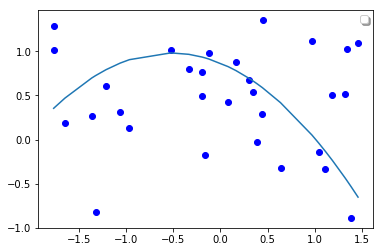

In [210]:
graph_plotter(X_1_poly_d2_scaled_coloumn_added,theta_1_d2,Y_1)

# 1-3. Fit the data using 4th order polynomial regression model (matrix form, gradient descent method).

In [211]:
X_1_poly_d4_scaled_coloumn_added = polynomial_adder(X_1,4)

## Optimized Weight - deg4

In [212]:
theta_1_d4 = weight_optimizer(X_1_poly_d4_scaled_coloumn_added,4,Y_1,epochs=1000000)
print (theta_1_d4)

[[ 0.45269151]
 [ 1.29328167]
 [-1.97124121]
 [ 0.40758024]
 [-0.09772327]]


## RMSE Deg-4

In [213]:
rms_1_d4 = rmse_calculator(X_1_poly_d4_scaled_coloumn_added,theta_1_d4,Y_1)
print (rms_1_d4)

0.2853539310798953


## Graph_Deg 4

No handles with labels found to put in legend.


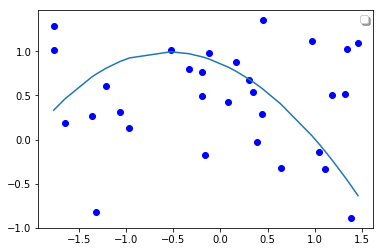

In [214]:
graph_plotter(X_1_poly_d4_scaled_coloumn_added,theta_1_d4,Y_1)

# 1-4. Fit the data using 16th order polynomial regression model (matrix form, gradient descent method).

In [215]:
X_1_poly_d16_scaled_coloumn_added = polynomial_adder(X_1,16)

## Optimized Weight - deg16

In [216]:
theta_1_d16 = weight_optimizer(X_1_poly_d16_scaled_coloumn_added,16,Y_1,epochs=1000000)
print (theta_1_d16)

[[ 0.45269151]
 [ 0.90569215]
 [-0.63905604]
 [ 0.58174172]
 [-2.18981068]
 [-0.36381962]
 [-0.48679136]
 [ 0.03242304]
 [ 1.22399681]
 [ 1.3783914 ]
 [ 0.51790883]
 [ 0.54350124]
 [-1.12891568]
 [ 0.26915691]
 [ 0.5333662 ]
 [-0.19490954]
 [-1.39357019]]


## RMSE - Deg4

In [217]:
rms_1_d16 = rmse_calculator(X_1_poly_d16_scaled_coloumn_added,theta_1_d16,Y_1)
print (rms_1_d16)

0.2625062559634639


## Graph_Deg 16

No handles with labels found to put in legend.


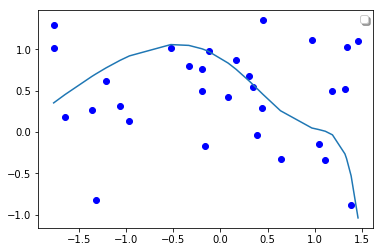

In [218]:
graph_plotter(X_1_poly_d16_scaled_coloumn_added,theta_1_d16,Y_1)

# 1-5. Fit the data using 16th order polynomial regression model with ridge (L2 penalty) regularization (matrix form, gradient descent method).
## You need to try at least 3 different L2 penalty (for example, λ = 0.1, 1, 10).

### λ = 0.1

#### Optimized weights λ = 0.1

In [219]:
theta_1_d16_regularised_1 = weight_optimizer(X_1_poly_d16_scaled_coloumn_added,16,Y_1,regularisation_alpha=0.1)
print (theta_1_d16_regularised_1)

[[ 0.45118755]
 [ 0.78496938]
 [-0.41986364]
 [-0.64770631]
 [-0.48516438]
 [-0.22691241]
 [ 0.00677979]
 [ 0.17744631]
 [ 0.27520327]
 [ 0.30862102]
 [ 0.28991242]
 [ 0.22673522]
 [ 0.12928467]
 [ 0.01020639]
 [-0.12850398]
 [-0.27605485]
 [-0.43514748]]


#### RMSE - λ = 0.1

In [220]:
rms_1_d16_regularised_1 = rmse_calculator(X_1_poly_d16_scaled_coloumn_added,theta_1_d16_regularised_1,Y_1)
print (rms_1_d16_regularised_1)

0.2693872247572115


### λ = 1

#### Optimized weights λ = 1

In [221]:
theta_1_d16_regularised_2 = weight_optimizer(X_1_poly_d16_scaled_coloumn_added,16,Y_1,regularisation_alpha=1)
print (theta_1_d16_regularised_2)

[[ 0.43808856]
 [ 0.30532714]
 [-0.11714469]
 [-0.21555533]
 [-0.18959658]
 [-0.12931817]
 [-0.06945018]
 [-0.02187918]
 [ 0.01069068]
 [ 0.02911397]
 [ 0.03545038]
 [ 0.03198174]
 [ 0.02082246]
 [ 0.00379041]
 [-0.01760999]
 [-0.04215991]
 [-0.06888419]]


#### RMSE - λ = 1


In [222]:
rms_1_d16_regularised_2 = rmse_calculator(X_1_poly_d16_scaled_coloumn_added,theta_1_d16_regularised_2,Y_1)
print (rms_1_d16_regularised_2)

0.30190806311237905


### λ = 10

#### Optimized weights λ = 10

In [223]:
theta_1_d16_regularised_3 = weight_optimizer(X_1_poly_d16_scaled_coloumn_added,16,Y_1,regularisation_alpha=10)
print (theta_1_d16_regularised_3)

[[ 0.33951863]
 [ 0.05560105]
 [-0.02707079]
 [-0.0564417 ]
 [-0.06173571]
 [-0.05764355]
 [-0.05057775]
 [-0.04323712]
 [-0.03668487]
 [-0.03126116]
 [-0.02699188]
 [-0.02377544]
 [-0.02146823]
 [-0.01992273]
 [-0.01900323]
 [-0.01859114]
 [-0.01858551]]


#### RMSE - λ = 10

In [224]:
rms_1_d16_regularised_3 = rmse_calculator(X_1_poly_d16_scaled_coloumn_added,theta_1_d16_regularised_3,Y_1)
print (rms_1_d16_regularised_3)

0.34575123097106086


#### Graph Plot λ = 0.1,1,10

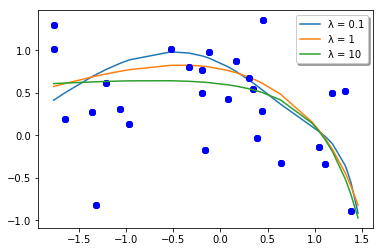

In [225]:
graph_plotter(X_1_poly_d16_scaled_coloumn_added,theta_1_d16_regularised_1,Y_1,graph_label="λ = 0.1")
graph_plotter(X_1_poly_d16_scaled_coloumn_added,theta_1_d16_regularised_2,Y_1,graph_label= "λ = 1")
graph_plotter(X_1_poly_d16_scaled_coloumn_added,theta_1_d16_regularised_3,Y_1,graph_label= "λ = 10")

# 1-6. Fit the data using 16th order polynomial regression model with scikit-learn Ridge model.
## You need to try at least 3 different L2 penalty (for example, λ = 0.1, 1, 10).

In [226]:
alpha = [0.1, 1, 10]

In [14]:
def ridge_optimized_weight(data,label,alpha=0.1):
    ridge_reg = Ridge(alpha=alpha, solver="cholesky")
    ridge_mode1 = ridge_reg.fit(data[:,1:], label)
    print ("Model-Intercept",ridge_mode1.intercept_)
    print ("Model-Co-ef",ridge_mode1.coef_.T)
    return ridge_mode1

In [15]:
def ridge_lasso_graph_plotter(data,actual_label,ridge_model,graph_label=None):
    X_1_poly_dn_scaled_coloumn_added_sorted = data[data[:,1].argsort()]
    Y_ridge_mode1_1_predict = ridge_model.predict(X_1_poly_dn_scaled_coloumn_added_sorted[:,1:])
    plt.plot(X_1_poly_dn_scaled_coloumn_added_sorted[:,1:2], actual_label, 'bo')
    plt.plot(X_1_poly_dn_scaled_coloumn_added_sorted[:,1:2], Y_ridge_mode1_1_predict,label=graph_label)
    legend = plt.legend(loc='upper right', shadow=True)

In [16]:
def ridge_lasso_rmse(data,actual_label,ridge_model):
    Y_ridge_mode1_1_predict = ridge_model.predict(data[:,1:])
    rms = sqrt(mean_squared_error(actual_label, Y_ridge_mode1_1_predict))
    return rms
    

#### Optimized_Weights ridge λ = 0.1

In [230]:
ridge_mode1_1 = ridge_optimized_weight(X_1_poly_d16_scaled_coloumn_added,Y_1,0.1)

Model-Intercept [0.45269151]
Model-Co-ef [[ 0.78485691]
 [-0.41980483]
 [-0.6474652 ]
 [-0.48475686]
 [-0.22708056]
 [ 0.00646183]
 [ 0.17607267]
 [ 0.27503508]
 [ 0.30951311]
 [ 0.28986803]
 [ 0.22699526]
 [ 0.13087521]
 [ 0.01010497]
 [-0.12814542]
 [-0.27800671]
 [-0.43473061]]


#### RMSE ridge λ = 0.1

In [231]:
rms_ridge_1 = ridge_lasso_rmse(X_1_poly_d16_scaled_coloumn_added,Y_1,ridge_mode1_1)
print(rms_ridge_1)

0.2693814634185468


#### Optimized Weights Ridge λ = 1

In [232]:
ridge_mode1_2 = ridge_optimized_weight(X_1_poly_d16_scaled_coloumn_added,Y_1,1)

Model-Intercept [0.45269151]
Model-Co-ef [[ 0.30532714]
 [-0.11714469]
 [-0.21555533]
 [-0.18959658]
 [-0.12931817]
 [-0.06945018]
 [-0.02187918]
 [ 0.01069068]
 [ 0.02911397]
 [ 0.03545038]
 [ 0.03198174]
 [ 0.02082246]
 [ 0.00379041]
 [-0.01760999]
 [-0.04215991]
 [-0.06888419]]


#### RMSE ridge λ = 1


In [233]:
rms_ridge_2 = ridge_lasso_rmse(X_1_poly_d16_scaled_coloumn_added,Y_1,ridge_mode1_2)
print(rms_ridge_2)

0.3015546921663988


#### Optimized Weights Ridge λ = 10

In [234]:
ridge_mode1_3 = ridge_optimized_weight(X_1_poly_d16_scaled_coloumn_added,Y_1,10)

Model-Intercept [0.45269151]
Model-Co-ef [[ 0.05560105]
 [-0.02707079]
 [-0.0564417 ]
 [-0.06173571]
 [-0.05764355]
 [-0.05057775]
 [-0.04323712]
 [-0.03668487]
 [-0.03126116]
 [-0.02699188]
 [-0.02377544]
 [-0.02146823]
 [-0.01992273]
 [-0.01900323]
 [-0.01859114]
 [-0.01858551]]


#### RMSE ridge λ = 10

In [235]:
rms_ridge_3 = ridge_lasso_rmse(X_1_poly_d16_scaled_coloumn_added,Y_1,ridge_mode1_3)
print(rms_ridge_3)

0.3267044743318329


#### Graph Plot Ridge λ = 0.1,1,10


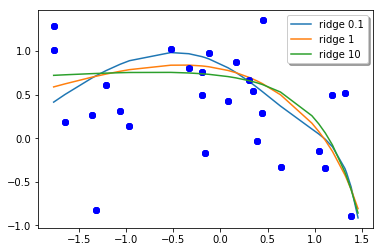

In [236]:
ridge_lasso_graph_plotter(X_1_poly_d16_scaled_coloumn_added,Y_1,ridge_mode1_1,graph_label="ridge 0.1")
ridge_lasso_graph_plotter(X_1_poly_d16_scaled_coloumn_added,Y_1,ridge_mode1_2,graph_label="ridge 1")
ridge_lasso_graph_plotter(X_1_poly_d16_scaled_coloumn_added,Y_1,ridge_mode1_3,graph_label="ridge 10")

## 1-7. Fit the data using 16th order polynomial regression model with scikit-learn Lasso model.

In [17]:
def lasso_optimized_weight(data,label,alpha=0.1):
    lasso_reg = Lasso(alpha)
    lasso_mode1 = lasso_reg.fit(data[:,1:], label)
    print ("Model-Intercept",lasso_mode1.intercept_)
    print ("Model-Co-ef",lasso_mode1.coef_.T)
    return lasso_mode1

#### Optimized_Weights lasso λ = 0.1


In [238]:
lasso_mode1_1 = lasso_optimized_weight(X_1_poly_d16_scaled_coloumn_added,Y_1,0.1)

Model-Intercept [0.45269151]
Model-Co-ef [-0.         -0.         -0.         -0.         -0.         -0.37373874
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.        ]


#### RMSE lasso λ = 0.1

In [239]:
rms_lasso_1 = ridge_lasso_rmse(X_1_poly_d16_scaled_coloumn_added,Y_1,lasso_mode1_1)
print(rms_lasso_1)

0.34466712593964577


#### Optimized_Weights lasso λ = 1

In [240]:
lasso_mode1_2 = lasso_optimized_weight(X_1_poly_d16_scaled_coloumn_added,Y_1,1)

Model-Intercept [0.45269151]
Model-Co-ef [-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]


#### RMSE lasso λ = 1

In [241]:
rms_lasso_2 = ridge_lasso_rmse(X_1_poly_d16_scaled_coloumn_added,Y_1,lasso_mode1_2)
print(rms_lasso_2)

0.5772554182087681


#### Optimized_Weights lasso λ = 10

In [242]:
lasso_mode1_3 = lasso_optimized_weight(X_1_poly_d16_scaled_coloumn_added,Y_1,10)

Model-Intercept [0.45269151]
Model-Co-ef [-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]


#### RMSE lasso λ = 10

In [243]:
rms_lasso_3 = ridge_lasso_rmse(X_1_poly_d16_scaled_coloumn_added,Y_1,lasso_mode1_3)
print(rms_lasso_3)

0.5772554182087681


#### Graph Plot Lasso λ = 0.1,1,10


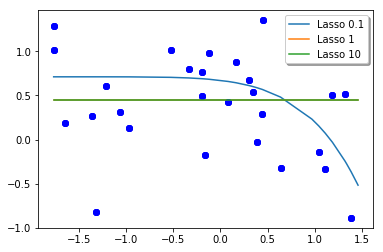

In [244]:
ridge_lasso_graph_plotter(X_1_poly_d16_scaled_coloumn_added,Y_1,lasso_mode1_1,graph_label="Lasso 0.1")
ridge_lasso_graph_plotter(X_1_poly_d16_scaled_coloumn_added,Y_1,lasso_mode1_2,graph_label="Lasso 1")
ridge_lasso_graph_plotter(X_1_poly_d16_scaled_coloumn_added,Y_1,lasso_mode1_3,graph_label="Lasso 10")

## 2.Polynomial regression with train/validation/test
### You need to split the data into training/validation/testing data set as 60% / 20% / 20%.
### Please use np.random.seed(1) to have consistent data for evaluation


### 2-1. Fit the data using linear (1st order) regression model (matrix form, gradient descent method).

In [245]:
# def plot_learning_curves(model, X, y):
#     X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
#     train_errors, val_errors = [], []
#     for m in range(1, len(X_train)):
#         model.fit(X_train[:m], y_train[:m])
#         y_train_predict = model.predict(X_train[:m])
#         y_val_predict = model.predict(X_val)
#         train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
#         val_errors.append(mean_squared_error(y_val_predict, y_val))
#     plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
#     plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    
# lin_reg = LinearRegression()
# plot_learning_curves(lin_reg, X, y)
    
# from sklearn.pipeline import Pipeline

# polynomial_regression = Pipeline([
#         ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
#         ("lin_reg", LinearRegression()),
#     ])

# plot_learning_curves(polynomial_regression, X, y)

In [6]:
data2 = pd.read_csv("ex2data2.csv")
X_2 = data2.as_matrix(columns=data2.columns[0:1])
Y_2 = data2.as_matrix(columns=data2.columns[1:])
X_2_poly_d1_scaled = scaler.fit_transform(X_2)
X_2_coloumn_added = np.c_[np.ones((data2.shape[0], 1)), X_2]
X_2_poly_d1_scaled_coloumn_added = np.c_[np.ones((data2.shape[0], 1)), X_2_poly_d1_scaled]


/anaconda2/envs/carnd-term1/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
data2.head


<bound method NDFrame.head of       sqft_living      price
0             430    80000.0
1             460   247000.0
2             470   192500.0
3             490   150000.0
4             500   125000.0
5             520    82500.0
6             520   275000.0
7             520   330000.0
8             550   353000.0
9             560   299000.0
10            570    89950.0
11            580   220000.0
12            580   330600.0
13            590   156000.0
14            600   229000.0
15            620   175000.0
16            620   244900.0
17            630   148000.0
18            630   315000.0
19            630   430000.0
20            650   295000.0
21            660   100000.0
22            660   175000.0
23            660   225000.0
24            660   227450.0
25            670   240000.0
26            670   245000.0
27            670   279000.0
28            670   348000.0
29            680   110700.0
...           ...        ...
5374         5840  2200000.0
5375         

(array([2.266e+03, 2.393e+03, 6.040e+02, 1.050e+02, 2.100e+01, 1.200e+01,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([  430.,  1741.,  3052.,  4363.,  5674.,  6985.,  8296.,  9607.,
        10918., 12229., 13540.]),
 <a list of 10 Patch objects>)

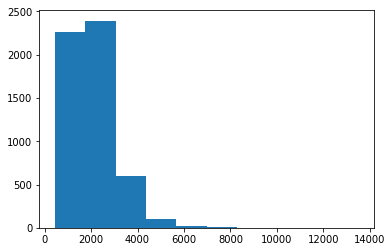

In [247]:
plt.hist(X_2)

In [248]:
X_2_train_val, X_2_test, y_2_train_val, y_2_test = train_test_split(X_2_poly_d1_scaled_coloumn_added , Y_2, test_size=0.2,random_state=1)
X_2_train, X_2_val, y_2_train, y_2_val = train_test_split(X_2_train_val, y_2_train_val, test_size=0.25,random_state=1)
print (X_2_coloumn_added.shape)
print (X_2_train_val.shape)
print (X_2_train.shape)

(5404, 2)
(4323, 2)
(3242, 2)


In [18]:
def Mean_Square_Error_calculator(data,weights,actual_label):
    predict_y = data.dot(weights)
    rms = mean_squared_error(actual_label, predict_y)
    return rms

In [19]:
def train_val_best_model(X_train, X_val, y_train, y_val,degree):
    epochs = [1000,10000,100000]
    learning_rate = [.001,.01,.1]
    train_errors, val_errors  = [], [] 
    counter = 1
    combination = {}
    for epoch in epochs:
        for rate in learning_rate:
            weights = weight_optimizer(X_train,degree,y_train,learn_rate = rate,epochs = epoch,regularisation_alpha=0)
            rmse_train = rmse_calculator(X_train,weights,y_train)
            rmse_val = rmse_calculator(X_val,weights,y_val)
            train_errors.append(rmse_train)
            val_errors.append(rmse_val)
            combination[counter] = (epoch,rate)
            counter += 1
    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    plt.plot(val_errors, "b-", linewidth=3, label="val")
    legend = plt.legend(loc='upper right', shadow=True)
    ## Find the lowest validation error
    counter_val_error = list(enumerate(val_errors, 1))
    counter_val_error_sorted = sorted(counter_val_error, key=lambda x:x[1])
    best_model = combination[(counter_val_error_sorted[0][0])]
    print(counter_val_error)
    print("Epoch and Learning Rate Combination",counter_val_error_sorted[0][0],best_model)
    return best_model
      

[(1, 257488.04094283126), (2, 249622.42769314421), (3, 249622.4277054363), (4, 249622.4276900577), (5, 249622.42770543642), (6, 249622.4277054363), (7, 249622.42770543747), (8, 249622.42770543642), (9, 249622.4277054363)]
Epoch and Learning Rate Combination 4 (10000, 0.001)


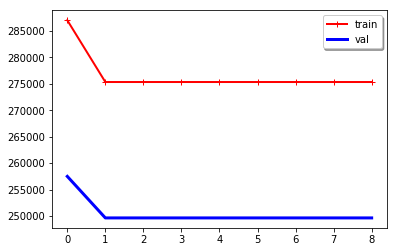

In [251]:
best_model_2 = train_val_best_model(X_2_train, X_2_val, y_2_train, y_2_val,1)
weights_best_model_2 = weight_optimizer(X_2_train,1,y_2_train,learn_rate = best_model_2 [1],epochs = best_model_2 [0],regularisation_alpha=0)

#### RMSE - Train,test Deg -1

In [252]:
rmse_train_2 = rmse_calculator(X_2_train,weights_best_model_2,y_2_train)
rmse_test_2 = rmse_calculator(X_2_test,weights_best_model_2,y_2_test)
print("rmse_train",rmse_train_2)
print("rmse_test",rmse_test_2)

rmse_train 275355.0256953383
rmse_test 264311.94247884274


#### Graph Train Deg-1

No handles with labels found to put in legend.


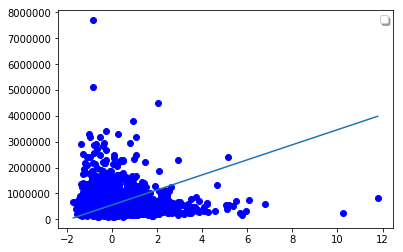

In [253]:
graph_plotter(X_2_train,weights_best_model_2,y_2_train,graph_label=None)

## 2-2. Fit the data using 2nd order polynomial regression model (matrix form, gradient descent method).

In [254]:
X_2_poly_d2_scaled_coloumn_added = polynomial_adder(X_2,2)

In [255]:
X_22_train_val, X_22_test, y_22_train_val, y_22_test = train_test_split(X_2_poly_d2_scaled_coloumn_added, Y_2, test_size=0.2,random_state=1)
X_22_train, X_22_val, y_22_train, y_22_val = train_test_split(X_22_train_val, y_22_train_val, test_size=0.25,random_state=1)

[(1, 254082.7389780978), (2, 244029.3535573043), (3, 244071.59635894437), (4, 244029.2686895008), (5, 244071.5963589144), (6, 244071.59635907054), (7, 244071.59635891087), (8, 244071.59635907042), (9, 244071.59635907054)]
Epoch and Learning Rate Combination 4 (10000, 0.001)


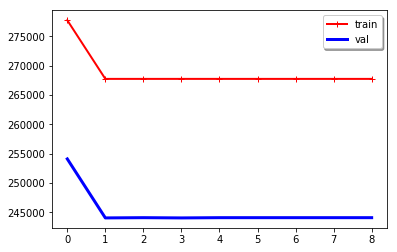

In [256]:
best_model_22 = train_val_best_model(X_22_train, X_22_val, y_22_train, y_22_val,2)
weights_best_model_22 = weight_optimizer(X_22_train,2,y_22_train,learn_rate = best_model_22 [1],epochs = best_model_22 [0],regularisation_alpha=0)

#### RMSE - Train,test Deg -2

In [257]:
rmse_train_22 = rmse_calculator(X_22_train,weights_best_model_22,y_22_train)
rmse_test_22 = rmse_calculator(X_22_test,weights_best_model_22,y_22_test)
print("rmse_train",rmse_train_22)
print("rmse_test",rmse_test_22)

rmse_train 267719.7117411374
rmse_test 254533.92847752557


#### Graph Train Deg-2

No handles with labels found to put in legend.


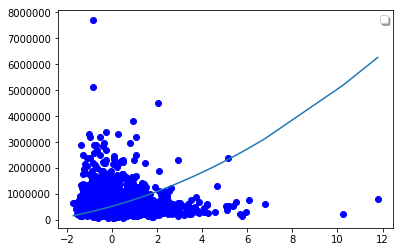

In [258]:
graph_plotter(X_22_train,weights_best_model_22,y_22_train,graph_label=None)

## 2-3. Fit the data using 4th order polynomial regression model (matrix form, gradient descent method).

In [259]:
X_2_poly_d4_scaled_coloumn_added = polynomial_adder(X_2,4)

In [260]:
X_24_train_val, X_24_test, y_24_train_val, y_24_test = train_test_split(X_2_poly_d4_scaled_coloumn_added, Y_2, test_size=0.2,random_state=1)
X_24_train, X_24_val, y_24_train, y_24_val = train_test_split(X_24_train_val, y_24_train_val, test_size=0.25,random_state=1)

[(1, 254205.33656847285), (2, 243001.66458493247), (3, 243544.8531816557), (4, 243001.8240493743), (5, 243544.6655575537), (6, 243854.6229242246), (7, 243544.64619277278), (8, 243854.612717776), (9, 244304.69676459354)]
Epoch and Learning Rate Combination 2 (1000, 0.01)


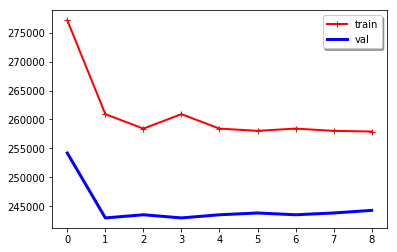

In [261]:
best_model_24 = train_val_best_model(X_24_train, X_24_val, y_24_train, y_24_val,4)
weights_best_model_24 = weight_optimizer(X_24_train,4,y_24_train,learn_rate = best_model_24 [1],epochs = best_model_24 [0],regularisation_alpha=0)

#### RMSE - Train,test Deg -4

In [262]:
rmse_train_24 = rmse_calculator(X_24_train,weights_best_model_24,y_24_train)
rmse_test_24 = rmse_calculator(X_24_test,weights_best_model_24,y_24_test)
print("rmse_train",rmse_train_24)
print("rmse_test",rmse_test_24)

rmse_train 260919.45768952757
rmse_test 251751.42950903866


No handles with labels found to put in legend.


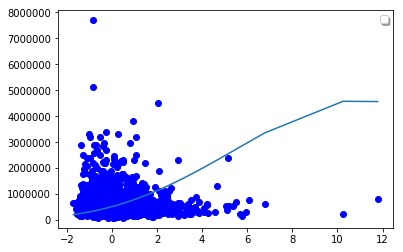

In [263]:
graph_plotter(X_24_train,weights_best_model_24,y_24_train,graph_label=None)

## 2-4. Fit the data using 16th order polynomial regression model (matrix form, gradient descent method).

In [26]:

def weight_optimizer_stoc_batch(data,degree,Label,learn_rate = .01,epochs = 100000,regularisation_alpha=0):
    theta_1 = np.random.randn(degree+1,1)
    data_size = data.shape[0]
    #print (data_size)
    batch_size = data_size // 16
    #print (batch_size)
    for epoch in range(epochs):
        for batch in range(batch_size):
            X_batch, y_batch = resample(data, Label, n_samples=16, random_state=0,replace=False)
            gradients = (2/X_batch.shape[0])* (X_batch.T.dot(X_batch.dot(theta_1)- y_batch)+ \
                                               regularisation_alpha*theta_1)
            theta_1 = theta_1 - learn_rate * gradients
    return theta_1

In [21]:
def train_val_best_model_stoc_batch(X_train, X_val, y_train, y_val,degree):
    epochs = [10000]
    learning_rate = [.001,.01,.1]
    train_errors, val_errors = [], []
    counter = 1
    combination = {}
    for epoch in epochs:
        for rate in learning_rate:
            weights = weight_optimizer_stoc_batch(X_train,degree,y_train,learn_rate = rate,epochs = epoch,regularisation_alpha=0)
            rmse_train = rmse_calculator(X_train,weights,y_train)
            rmse_val = rmse_calculator(X_val,weights,y_val)
            train_errors.append(rmse_train)
            val_errors.append(rmse_val)
            combination[counter] = (epoch,rate)
            counter += 1
    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    plt.plot(val_errors, "b-", linewidth=3, label="val")
    legend = plt.legend(loc='upper right', shadow=True)
    ## Find the lowest validation error
    counter_val_error = list(enumerate(val_errors, 1))
    counter_val_error_sorted = sorted(counter_val_error, key=lambda x:x[1])
    best_model = combination[(counter_val_error_sorted[0][0])]
    print(counter_val_error)
    print("Epoch and Learning Rate Combination",counter_val_error_sorted[0][0],best_model)
    return best_model

In [22]:
X_2_poly_d16_scaled_coloumn_added = polynomial_adder(X_2,16)

In [23]:
X_216_train_val, X_216_test, y_216_train_val, y_216_test = train_test_split(X_2_poly_d16_scaled_coloumn_added, Y_2, test_size=0.2,random_state=1)
X_216_train, X_216_val, y_216_train, y_216_val = train_test_split(X_216_train_val, y_216_train_val, test_size=0.25,random_state=1)

#### Implemented Mini-batch Gradient Descent as I was getting error with full batch 

3242
202
3242
202
3242
202
[(1, 271431.84548393165), (2, 621086.9719878328), (3, 1715299.1157242693)]
Epoch and Learning Rate Combination 1 (10000, 0.001)
3242
202


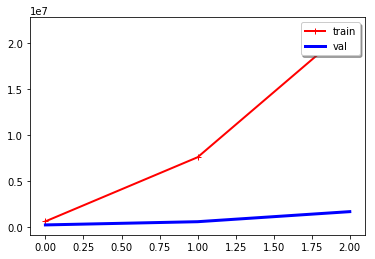

In [373]:
best_model_216 = train_val_best_model_stoc_batch(X_216_train, X_216_val, y_216_train, y_216_val,16)
weights_best_model_216 = weight_optimizer_stoc_batch(X_216_train,16,y_216_train,learn_rate = best_model_216 [1],epochs = best_model_216 [0],regularisation_alpha=0)

In [374]:
rmse_train_216 = rmse_calculator(X_216_train,weights_best_model_216,y_216_train)
rmse_test_216 = rmse_calculator(X_216_test,weights_best_model_216,y_216_test)
print("rmse_train",rmse_train_216)
print("rmse_test",rmse_test_216)

rmse_train 656156.7479793766
rmse_test 274794.112255375


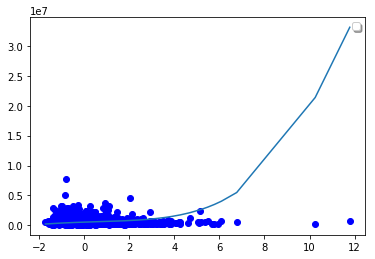

In [375]:
graph_plotter(X_216_train,weights_best_model_216,y_216_train,graph_label=None)

## 2-5. Fit the data using 16th order polynomial regression model with ridge (L2 penalty) regularization.

In [27]:
def train_val_best_model_ridge_stoc_batch(X_train, X_val, y_train, y_val,degree):
    epochs = [10000]
    learning_rate = [.01]
    regularisation_alpa = [.1,1,10]
    train_errors, val_errors = [], []
    weights_list = []
    counter = 1
    combination = {}
    for epoch in epochs:
        for rate in learning_rate:
            for alpha in regularisation_alpa:
                weights = weight_optimizer_stoc_batch(X_train,degree,y_train,learn_rate = rate,epochs = epoch, \
                                           regularisation_alpha=alpha)
                weights_list.append(weights)
                rmse_train = rmse_calculator(X_train,weights,y_train)
                rmse_val = rmse_calculator(X_val,weights,y_val)
                train_errors.append(rmse_train)
                val_errors.append(rmse_val)
                combination[counter] = (epoch,rate,alpha)
                counter += 1
    weights_array = np.asarray(weights_list)
    print (weights_array)
    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    plt.plot(val_errors, "b-", linewidth=3, label="val")
    legend = plt.legend(loc='upper right', shadow=True)
    ## Find the lowest validation error
    counter_val_error = list(enumerate(val_errors, 1))
    counter_val_error_sorted = sorted(counter_val_error, key=lambda x:x[1])
    best_model = combination[(counter_val_error_sorted[0][0])]
    print(best_model)
    return best_model,weights_array

#### Implemented Mini-batch Gradient Descent as I was getting error with full batch 

[[[529311.56308421]
  [140367.80182524]
  [ -4546.74748686]
  [-28473.30732643]
  [-19788.63272868]
  [-15000.66415285]
  [-12895.44455603]
  [-11538.24832723]
  [-10566.67038328]
  [ -9891.60090774]
  [ -9426.90906073]
  [ -9097.26154915]
  [ -8850.68250377]
  [ -8655.58649547]
  [ -8493.84397512]
  [ -8355.19791351]
  [ -8233.75543243]]

 [[504369.59043868]
  [112854.12132627]
  [ 20818.52540674]
  [-23880.56066294]
  [-26120.99445878]
  [-19357.51087343]
  [-14465.9510496 ]
  [-11760.93642951]
  [-10310.04194258]
  [ -9496.30495061]
  [ -9002.50480531]
  [ -8673.93636613]
  [ -8435.03414097]
  [ -8248.08593394]
  [ -8093.69358333]
  [ -7961.51143409]
  [ -7845.77403797]]

 [[333564.0674735 ]
  [ 66591.27018116]
  [ 11619.48500806]
  [-16917.22262927]
  [-18072.40431746]
  [-13199.53401866]
  [ -9722.42710617]
  [ -7830.67797699]
  [ -6834.78228822]
  [ -6285.08729544]
  [ -5955.10514574]
  [ -5736.84789641]
  [ -5578.58986315]
  [ -5454.8830961 ]
  [ -5352.75811019]
  [ -5265.335096

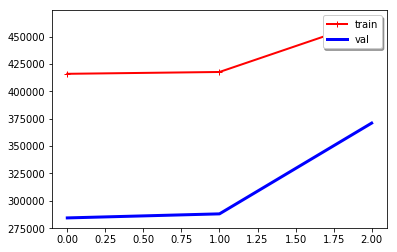

In [28]:
best_model_216_ridge,weights_array = train_val_best_model_ridge_stoc_batch(X_216_train, X_216_val, y_216_train, y_216_val,16)
weights_best_model_216_ridge = weight_optimizer_stoc_batch(X_216_train,16,y_216_train,learn_rate = best_model_216_ridge [1],epochs = best_model_216_ridge [0],regularisation_alpha=best_model_216_ridge [2])

In [34]:
weights_array = weights_array.reshape(3,17)

In [51]:
weights_array[:,1]

array([140367.80182524, 112854.12132627,  66591.27018116])

In [89]:
def weights_plotter(weights_array):
    fig = plt.figure(figsize=(10,8))
    plt.ylabel('Weights')
    plt.xlabel('alpha')
    for i in range(1,weights_array.shape[1]):
        plt.plot([0.1,1,10],weights_array[:,i],'-+',label="degree % i" %i)
        legend = plt.legend(loc='upper right', shadow=True)

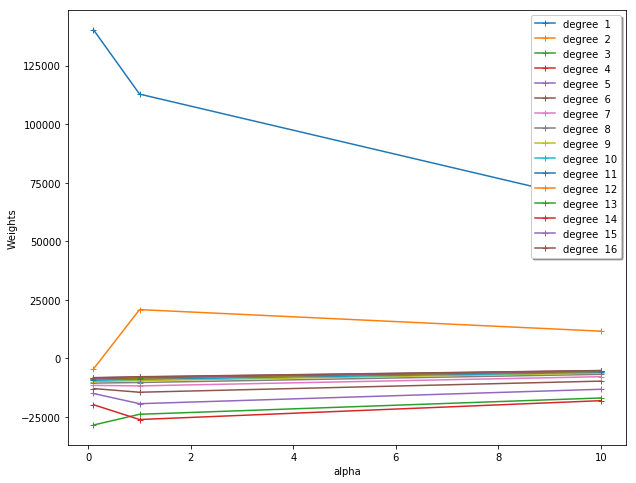

In [90]:
weights_plotter(weights_array)

In [383]:
rmse_train_216_ridge = rmse_calculator(X_216_train,weights_best_model_216_ridge,y_216_train)
rmse_test_216_ridge = rmse_calculator(X_216_test,weights_best_model_216_ridge,y_216_test)
print("rmse_train",rmse_train_216_ridge)
print("rmse_test",rmse_test_216_ridge)

rmse_train 415963.5773494703
rmse_test 321415.22175827075


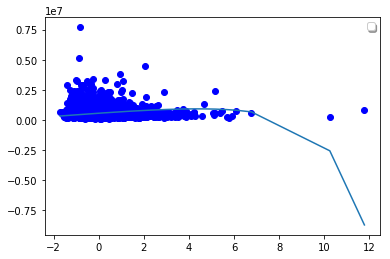

In [385]:
graph_plotter(X_216_train,weights_best_model_216_ridge,y_216_train,graph_label=None)

## 2-6. Fit the data using 16th order polynomial regression model with scikit-learn Ridge model.

In [64]:
def train_val_best_model_scikit_ridge(X_train, X_val, y_train, y_val):
    regularisation_alpa = [0.1,1,10] 
    train_errors, val_errors = [], []
    counter = 1
    combination = {}
    weights_list = []
    for alpha in regularisation_alpa:
        ridge_model = ridge_optimized_weight(X_train,y_train,alpha)
        weights_list.append(ridge_model.coef_)
        rmse_train = ridge_lasso_rmse(X_train,y_train,ridge_model)
        rmse_val = ridge_lasso_rmse(X_val,y_val,ridge_model)
        train_errors.append(rmse_train)
        val_errors.append(rmse_val)
        combination[counter] = (alpha,ridge_model)
        counter += 1
    weights_array = np.asarray(weights_list)
    #print (weights_array)
    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    plt.plot(val_errors, "b-", linewidth=3, label="val")
    legend = plt.legend(loc='upper right', shadow=True)
    ## Find the lowest validation error
    counter_val_error = list(enumerate(val_errors, 1))
    counter_val_error_sorted = sorted(counter_val_error, key=lambda x:x[1])
    best_model = combination[(counter_val_error_sorted[0][0])]
    print("alpha",best_model[0])
    return best_model[1],weights_array

Model-Intercept [547704.506878]
Model-Co-ef [[  47149.02303585]
 [  97806.15914125]
 [ 494262.89050946]
 [-227237.60901432]
 [-422132.21976636]
 [-199882.87630559]
 [  64994.59063826]
 [ 230729.38940244]
 [ 287757.59283936]
 [ 265072.70818138]
 [ 193352.45983527]
 [  95486.86500499]
 [ -13592.57195474]
 [-124860.40617845]
 [-233169.41195629]
 [-335762.59926058]]
Model-Intercept [547718.99272249]
Model-Co-ef [[ -16344.34115262]
 [ 320155.60757134]
 [ 172666.68142153]
 [-173831.65937522]
 [-211992.23283438]
 [ -77256.72585303]
 [  64972.77614043]
 [ 152621.76687899]
 [ 180680.13409481]
 [ 162984.49861422]
 [ 115562.95467406]
 [  51361.29686543]
 [ -20522.80095625]
 [ -94191.55415056]
 [-166059.86068628]
 [-234099.56514392]]
Model-Intercept [547547.03238267]
Model-Co-ef [[  36166.43778387]
 [ 269023.40114305]
 [  77631.40011951]
 [ -81988.69738317]
 [ -71553.92749472]
 [  -5369.60495591]
 [  48807.03808062]
 [  74843.22643076]
 [  76275.4587262 ]
 [  60869.18534266]
 [  35528.32733298]
 [

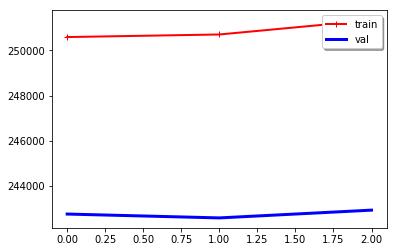

In [65]:
best_model_216_scikit_ridge,weights_array_scikit_ridge = train_val_best_model_scikit_ridge(X_216_train, X_216_val, y_216_train, y_216_val)


In [68]:
weights_array_scikit_ridge = weights_array_scikit_ridge.reshape(3,16)

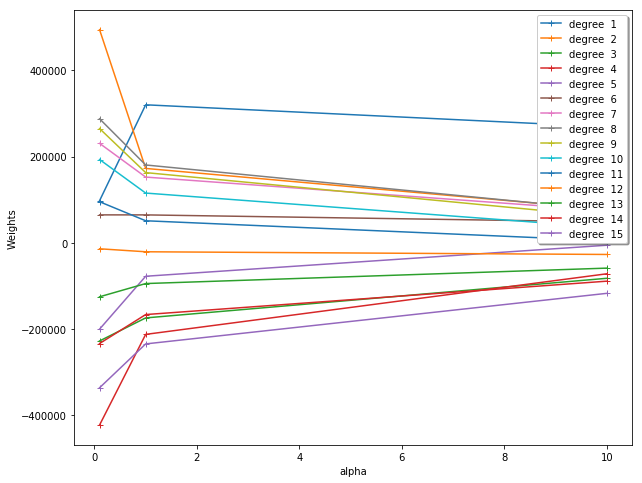

In [91]:
weights_plotter(weights_array_scikit_ridge)

In [270]:
rmse_train_216_scikit_ridge = ridge_lasso_rmse(X_216_train, y_216_train,best_model_216_scikit_ridge)
rmse_test_216_scikit_ridge = ridge_lasso_rmse(X_216_test,y_216_test,best_model_216_scikit_ridge)
print("rmse_train",rmse_train_216_scikit_ridge)
print("rmse_test",rmse_test_216_scikit_ridge)

rmse_train 250700.05033093243
rmse_test 251065.74316573926


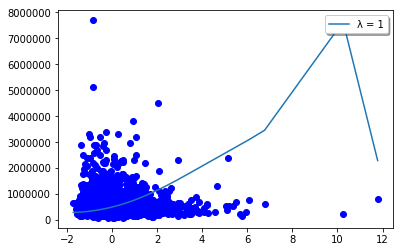

In [271]:
ridge_lasso_graph_plotter(X_216_train,y_216_train,best_model_216_scikit_ridge,graph_label="λ = 1")

## 2-7. Fit the data using 16th order polynomial regression model with scikit-learn Lasso model.

In [76]:
def train_val_best_model_scikit_lasso(X_train, X_val, y_train, y_val):
    regularisation_alpa = [0.1,1,10] 
    train_errors, val_errors = [], []
    counter = 1
    combination = {}
    weights_list = []
    for alpha in regularisation_alpa:
        lasso_model = lasso_optimized_weight(X_train,y_train,alpha)
        weights_list.append(lasso_model.coef_)
        rmse_train = ridge_lasso_rmse(X_train,y_train,lasso_model)
        rmse_val = ridge_lasso_rmse(X_val,y_val,lasso_model)
        train_errors.append(rmse_train)
        val_errors.append(rmse_val)
        combination[counter] = (alpha,lasso_model)
        counter += 1
    weights_array = np.asarray(weights_list)
    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    plt.plot(val_errors, "b-", linewidth=3, label="val")
    legend = plt.legend(loc='upper right', shadow=True)
    ## Find the lowest validation error
    counter_val_error = list(enumerate(val_errors, 1))
    counter_val_error_sorted = sorted(counter_val_error, key=lambda x:x[1])
    best_model = combination[(counter_val_error_sorted[0][0])]
    print("alpha",best_model[0])
    return best_model[1],weights_array

/anaconda2/envs/carnd-term1/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Model-Intercept [547780.08000696]
Model-Co-ef [-125318.97003623  666197.50707237 -261841.01303223 -187309.44448817
   77160.31260774  155957.01757717  125786.49836694   69160.91493416
   19708.08956119  -14840.20562329  -36093.17315681  -47445.45636661
  -52259.47895543  -52993.40874272  -51325.09359054  -48343.58909978]
Model-Intercept [547779.73592156]
Model-Co-ef [-124992.36217718  665263.70260852 -260753.01353071 -187340.17063375
   76345.133887    155967.41656718  125762.63818031   69164.76212111
   19900.84319741  -14276.41829556  -36175.49317507  -47521.03245514
  -52327.97275879  -53055.02152518  -51380.27127648  -48392.87104231]
Model-Intercept [547776.26865725]
Model-Co-ef [-121721.55990706  655932.64030426 -249919.8823818  -187602.71597435
   68214.49580173  156107.22185177  125530.49711011   69166.91275706
   21367.94806767   -8139.49732978  -37011.24562008  -48290.1479555
  -53026.14960449  -53683.77064736  -51943.80255891  -48896.47767207]
alpha 0.1


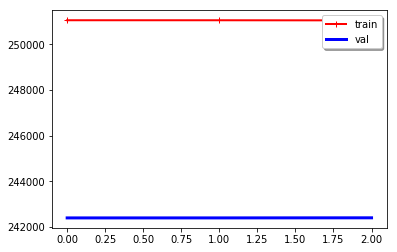

In [77]:
best_model_216_scikit_lasso,weights_array_scikit_lasso = train_val_best_model_scikit_lasso(X_216_train, X_216_val, y_216_train, y_216_val)


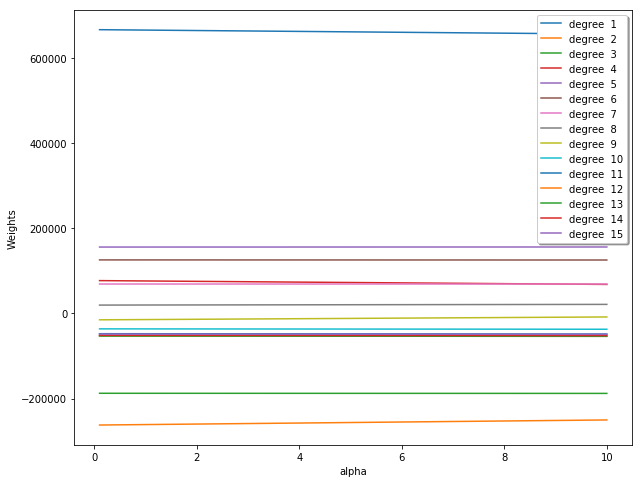

In [79]:
weights_plotter(weights_array_scikit_lasso)

In [274]:
rmse_train_216_scikit_lasso = ridge_lasso_rmse(X_216_train, y_216_train,best_model_216_scikit_lasso)
rmse_test_216_scikit_lasso = ridge_lasso_rmse(X_216_test,y_216_test,best_model_216_scikit_lasso)
print("rmse_train",rmse_train_216_scikit_lasso)
print("rmse_test",rmse_test_216_scikit_lasso)

rmse_train 251063.94309086326
rmse_test 250161.4085909059


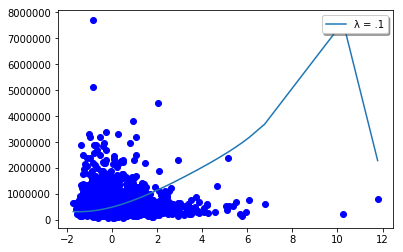

In [275]:
ridge_lasso_graph_plotter(X_216_train,y_216_train,best_model_216_scikit_lasso,graph_label="λ = .1")

## 3-1. Fit the training data using regression model with ridge (L2 penalty) regularization with scikit-learn Ridge model.

In [80]:
data3 = pd.read_csv("ex2data3.csv")
del data3['Unnamed: 0']

In [81]:
X_3 = data3.as_matrix(columns=data3.columns[0:8])
Y_3 = data3.as_matrix(columns=data3.columns[8:])
X_3_scaled = scaler.fit_transform(X_3)
X_3_scaled_coloumn_added = np.c_[np.ones((data3.shape[0], 1)), X_3_scaled]

In [82]:
X_3_train_val, X_3_test, y_3_train_val, y_3_test = train_test_split(X_3_scaled_coloumn_added, Y_3, test_size=0.2,random_state=1)
X_3_train, X_3_val, y_3_train, y_3_val = train_test_split(X_3_train_val, y_3_train_val, test_size=0.25,random_state=1)

Model-Intercept [2.07192364]
Model-Co-ef [[ 0.82501033]
 [ 0.12438917]
 [-0.23245061]
 [ 0.2778601 ]
 [-0.00178963]
 [-0.03738571]
 [-0.9098153 ]
 [-0.88498937]]
Model-Intercept [2.07192619]
Model-Co-ef [[ 0.82499755]
 [ 0.12448827]
 [-0.23231252]
 [ 0.27766071]
 [-0.0017563 ]
 [-0.03738623]
 [-0.90885179]
 [-0.88401781]]
Model-Intercept [2.07195156]
Model-Co-ef [[ 0.82484941]
 [ 0.12546401]
 [-0.23091504]
 [ 0.27566139]
 [-0.00142815]
 [-0.03739063]
 [-0.89934824]
 [-0.87443278]]
alpha 0.1


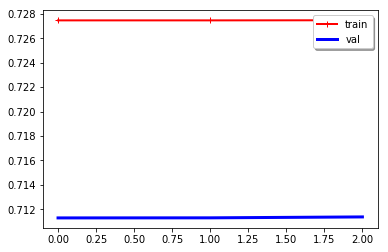

In [92]:
best_model_3_scikit_ridge,weights_3rddataset_ridge = train_val_best_model_scikit_ridge(X_3_train, X_3_val, y_3_train, y_3_val)


In [94]:
weights_3rddataset_ridge = weights_3rddataset_ridge.reshape(3,8)


In [102]:
weights_3rddataset_ridge.shape

(3, 8)

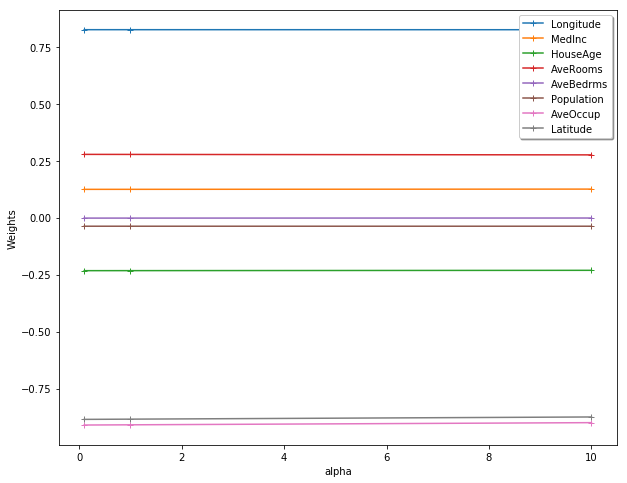

In [104]:
fig = plt.figure(figsize=(10,8))
plt.ylabel('Weights')
plt.xlabel('alpha')
labels = ["MedInc","HouseAge","AveRooms","AveBedrms","Population","AveOccup","Latitude","Longitude"]
for i in range(len(weights_3rddataset_ridge[1])):
    plt.plot([0.1,1,10],weights_3rddataset_ridge[:,i],'-+',label=labels[i-1])
    legend = plt.legend(loc='upper right', shadow=True)

In [280]:
rmse_train_3_scikit_ridge = ridge_lasso_rmse(X_3_train, y_3_train,best_model_3_scikit_ridge)
rmse_test_3_scikit_ridge = ridge_lasso_rmse(X_3_test,y_3_test,best_model_3_scikit_ridge)
print("rmse_train",rmse_train_3_scikit_ridge)
print("rmse_test",rmse_test_3_scikit_ridge)

rmse_train 0.7274577804827311
rmse_test 0.7276608037847032


## 3-2. Fit the training data using regression model with lasso (L1 penalty) regularization with scikit-learn Lasso model.

Model-Intercept [2.07432847]
Model-Co-ef [ 0.71386457  0.11001596 -0.          0.         -0.         -0.
 -0.00645422 -0.        ]
Model-Intercept [2.07444727]
Model-Co-ef [ 0.  0.  0. -0. -0. -0. -0. -0.]
Model-Intercept [2.07444727]
Model-Co-ef [ 0.  0.  0. -0. -0. -0. -0. -0.]
alpha 0.1


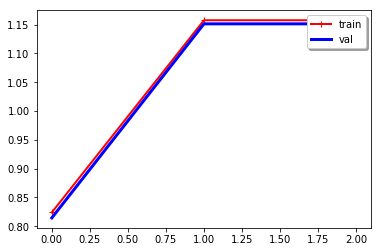

In [105]:
best_model_3_scikit_lasso,weights_3rddataset_lasso = train_val_best_model_scikit_lasso(X_3_train, X_3_val, y_3_train, y_3_val)


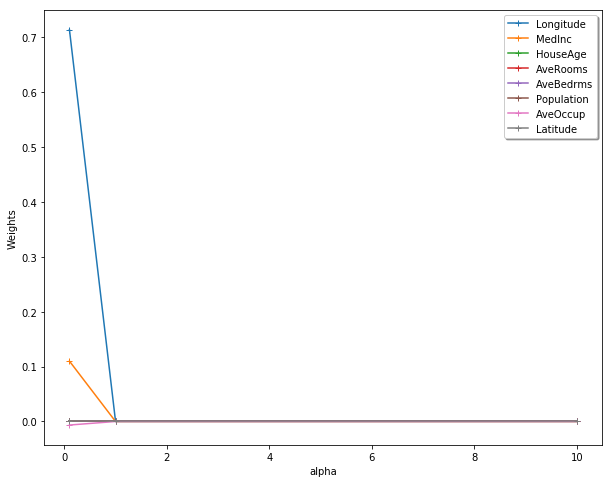

In [106]:
fig = plt.figure(figsize=(10,8))
plt.ylabel('Weights')
plt.xlabel('alpha')
labels = ["MedInc","HouseAge","AveRooms","AveBedrms","Population","AveOccup","Latitude","Longitude"]
for i in range(len(weights_3rddataset_lasso[1])):
    plt.plot([0.1,1,10],weights_3rddataset_lasso[:,i],'-+',label=labels[i-1])
    legend = plt.legend(loc='upper right', shadow=True)

In [282]:
rmse_train_3_scikit_lasso = ridge_lasso_rmse(X_3_train, y_3_train,best_model_3_scikit_lasso)
rmse_test_3_scikit_lasso = ridge_lasso_rmse(X_3_test,y_3_test,best_model_3_scikit_lasso)
print("rmse_train",rmse_train_3_scikit_lasso)
print("rmse_test",rmse_test_3_scikit_lasso)

rmse_train 0.8239579515519808
rmse_test 0.8147268457966831


## 3-3. Fit the training data using regression model with ridge (L2 penalty) regularization using TensorFlow.

[(1, 0.7112967302993075), (2, 0.7113041668913476), (3, 0.7113889023293248)]
Epoch ,Learning Rate and alpha Combination (10000, 0.01, 0.1)
train_error 0.727470627034165
test_error 0.7275337209461726


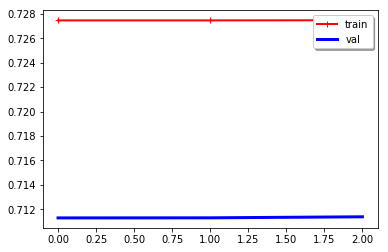

In [113]:
epochs_list = [10000]
alpha_list = [.1,1,10]
learning_rate_list = [.01]
weights_list_tensor=[]
#n_epochs = 10000
#learning_rate = 0.01
#alpha = 0.1

tf.reset_default_graph()

X_3 = tf.placeholder(tf.float64)
Y_3 = tf.placeholder(tf.float64)
theta = tf.Variable(tf.random_uniform([data3.shape[1], 1], -1.0, 1.0, dtype=tf.float64, name="theta"))
learning_rate = tf.placeholder(dtype=tf.float64)
alpha = tf.placeholder(dtype=tf.float64)
train_errors = []
val_errors = []
counter = 1
combination = {}


y_pred_3 = tf.matmul(X_3, theta, name="predictions")
error = y_pred_3 - Y_3
mse = tf.sqrt(tf.reduce_mean(tf.square(error), name="mse"))
gradients = 2/tf.shape(X_3)[0] * (tf.matmul(tf.transpose(X_3), error)+alpha*theta)
training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for n_epochs in epochs_list:
        for alpha_value in alpha_list:
            for learning_rate_value in learning_rate_list:
                    for epoch in range(n_epochs):
                                sess.run(training_op,feed_dict={X_3: X_3_train, Y_3: y_3_train, \
                                                                learning_rate: learning_rate_value,alpha: alpha_value})
                    train_errors.append(sess.run(mse,feed_dict={X_3: X_3_train, Y_3: y_3_train, \
                                                               learning_rate: learning_rate_value,alpha: alpha_value}))
                    val_errors.append(sess.run(mse,feed_dict={X_3: X_3_val, Y_3: y_3_val, \
                                                             learning_rate: learning_rate_value,alpha: alpha_value}))
                    weights_list_tensor.append(theta.eval())
                    combination[counter] = (n_epochs,learning_rate_value,alpha_value)
                    counter += 1
        ## Find the lowest validation error
    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    plt.plot(val_errors, "b-", linewidth=3, label="val")
    legend = plt.legend(loc='upper right', shadow=True)
    counter_val_error = list(enumerate(val_errors, 1))
    counter_val_error_sorted = sorted(counter_val_error, key=lambda x:x[1])
    best_model = combination[(counter_val_error_sorted[0][0])]
    print(counter_val_error)
    print("Epoch ,Learning Rate and alpha Combination",best_model)
    ##print train,test error
    print("train_error",sess.run(mse,feed_dict={X_3: X_3_train, Y_3: y_3_train, \
                                                               learning_rate: best_model[1],alpha: best_model[2]}))
    print("test_error",sess.run(mse,feed_dict={X_3: X_3_test, Y_3: y_3_test, \
                                                           learning_rate: best_model[1],alpha: best_model[2]}))

    

    

In [117]:
weights_list_tensor_array = np.asarray(weights_list_tensor)

In [118]:
weights_list_tensor_array = weights_list_tensor_array.reshape(3,9)

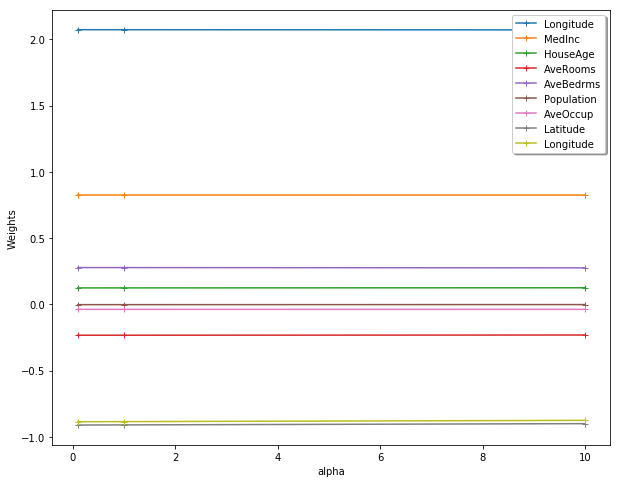

In [119]:
fig = plt.figure(figsize=(10,8))
plt.ylabel('Weights')
plt.xlabel('alpha')
labels = ["MedInc","HouseAge","AveRooms","AveBedrms","Population","AveOccup","Latitude","Longitude"]
for i in range(len(weights_list_tensor_array[1])):
    plt.plot([0.1,1,10],weights_list_tensor_array[:,i],'-+',label=labels[i-1])
    legend = plt.legend(loc='upper right', shadow=True)

## 3-4. Fit the training data using regression model with lasso (L1 penalty) regularization using TensorFlow.